dtype of y float64
x 47040000
x_train 38102400
x_test 4704000
y 60000
y_train 48600
y_test 6000


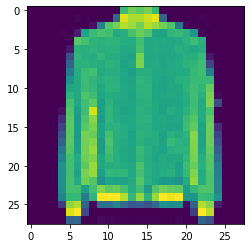

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               196250    
_________________________________________________________________
activation (Activation)      (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32128     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3225      
_________________________________________________________________
activation_2 (Activation)    (None, 25)                0

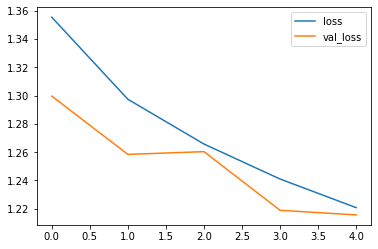

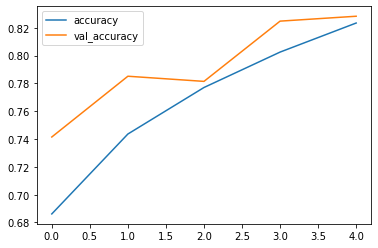

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,Flatten
import timeit
from keras.layers import AveragePooling2D


#Data Visualization- MNIST Dataset
def image_label(images, labels):
        fig,ax=plt.subplots(6, 6)
        for i in range(36):
            plt.subplot(6, 6, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(images[i], cmap=plt.cm.binary)
            plt.xlabel((labels[i]))
        fig.tight_layout()   
        plt.show()

#image_label(x, y)
data = np.load(r'C:\Users\ramee\Downloads\fashion_mnist_dataset_train.npy', allow_pickle=True).item()
    
x = data['features']
y = data['target']

from keras.utils import to_categorical
#y = to_categorical(y)
#y_test = to_categorical(y_test)
#y_train[0]
#cat = pd.Categorical(['1', '2','3','4','5'])
#y = y.astype("category", categories=cat.categories)
#y.astype(factor)
print('dtype of y',y.dtype)

#Train-test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, test_size=0.1)

print('x',np.size(x))
print('x_train',np.size(x_train))
print('x_test',np.size(x_test))

print('y',np.size(y))
print('y_train',np.size(y_train))
print('y_test',np.size(y_test))

#viewing one of the train images
import matplotlib.pyplot as plt
image = x_train[785]
plt.imshow(image)
plt.show()

#CNN
import tensorflow as tf
from tensorflow import keras
#model = tf.keras.Sequential(
    #[
    #tf.keras.layers.Conv2D(32, (3,3), padding='valid', activation="relu",input_shape=(28, 28, 1)),
    #tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    #tf.keras.layers.Conv2D(62, (3,3), padding='same', activation="relu"),
    #tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        
    #tf.keras.layers.Conv2D(100, (3,3), padding='same', activation="relu"),
    #tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        
    #tf.keras.layers.Conv2D(50, (5,5), padding='valid', activation="relu"),
    #tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    #tf.keras.layers.Flatten(),
   
    #tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(6, activation="softmax")
#]
#)
hidden_units2 = 128
hidden_units1 = 250
hidden_units3 = 25

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(hidden_units1))
model.add(Activation('relu'))
tf.keras.layers.Dropout(0.2),

#model.add(ResNet50(include_top = False))

model.add(Dense(hidden_units2))
model.add(Activation('relu'))

model.add(Dense(hidden_units3))
model.add(Activation('relu'))
tf.keras.layers.Dropout(0.2),



#model.add(Dense(hidden_units3))
#model.add(Activation('softmax'))
model.add(Dense(6, activation='softmax'))
#kernel_regularizer='l1' in dense() layer for l1 regularization
#Model Visualization
import tensorflow as tf
from tensorflow import keras
import pydot as pyd
#from keras.utils.vis_utils import model_to_dot
#keras.utils.vis_utils.pydot = pyd

model.summary()
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

#With Dropout layer added to the model
#Compiling the model
#keras.optimizers.Adam(learning_rate=0.01)
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=100,
    decay_rate=1)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=2)
]

#Save the best model
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

#New callbacks
callbacks = [
             EarlyStopping(patience=2),
             model_checkpoint_callback,
]
#another_saved_model = tf.keras.models.load_model(checkpoint_filepath)

#Fitting model
# Set input shape
sample_shape = x_train[0].shape
img_width, img_height = sample_shape[0], sample_shape[1]
input_shape = (img_width, img_height, 1)

# Reshape data 
input_train = x_train.reshape(len(x_train), input_shape[0], input_shape[1], input_shape[2])
input_test  = x_test.reshape(len(x_test), input_shape[0], input_shape[1], input_shape[2])
input_val  = x_val.reshape(len(x_val), input_shape[0], input_shape[1], input_shape[2])

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
valid_data = tf.data.Dataset.from_tensor_slices((x_val, y_val))
#history=model.fit(input_train, epochs=5, validation_data=(input_val, y_val))
#history = model.fit(x_train,y_train, epochs=600,validation_data=(x_test,y_test),callbacks=callbacks)


##Data Augmentaion
# create data generator
#tf.keras.preprocessing.image.ImageDataGenerator
#datagen = tf.keras.preprocessing.image.ImageDataGenerator()
#it = datagen.flow(input_train, y_train)
#history=model.fit_generator(it,validation_data=(input_test, y_test), epochs=10)

start = timeit.timeit()
history=model.fit(input_train, y_train,  validation_data=(input_val, y_val), epochs=5)
end = timeit.timeit()
print("end-start",end - start)
import pandas as pd
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy","val_accuracy"]].plot();
#model.save("model.h5")
#load_saved_model = tf.keras.models.load_model("model.h5")
#load_saved_model.summary()

test= np.load(r'C:\Users\ramee\Downloads\fashion_mnist_dataset_kaggle_test.npy', allow_pickle=True).item()
print('size-test',np.size(test))
print('test',(test))
#test = list(test)
#test = np. array(test)
test = test['features']
print('test2',(test))
sample_shape1 = test[0].shape
img_width1, img_height1 = sample_shape1[0], sample_shape1[1]
input_shape1 = (img_width1, img_height1, 1)
test= test.reshape(len(test), input_shape1[0], input_shape1[1], input_shape1[2])
ans=(model.predict(test))
print('ans',ans)

probas = ans
labels = np.argmax(probas, axis=-1)    
print(labels)

start2 = timeit.timeit()
ans2=(model.predict(input_test))
end2 = timeit.timeit()
print("end2-start2",end2 - start2)
print('ans2',ans2)

from sklearn import metrics
probas2 = ans2
labels2 = np.argmax(probas2, axis=-1)    
print(labels2)
print('test set accuracy',metrics.accuracy_score(y_test, labels2))
print('test set f1_score',metrics.f1_score(y_test, labels2, average='macro'))
print(' precision_score',metrics.precision_score(y_test, labels2, average='macro'))
print(' recall_score',metrics.recall_score(y_test,labels2, average='macro'))



DF = pd.DataFrame(labels)
#DF1 = round(pd.DataFrame(ans))
print('df',DF)
# save the dataframe as a csv file
DF.to_csv("CNN6.csv")
#DF1.to_csv("ans1.csv")
